# Stock Analysis
## Evy Haan 3/12/2019
### Regression analysis of 5 years of closings for Tableau

In [1]:
import numpy as np
import numpy.polynomial.polynomial as poly
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

import datetime as dt
import requests

In [2]:
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = [12.0, 8.0]

In [3]:
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [4]:
API_URL = 'https://api.iextrading.com/1.0'
STOCK = 'DATA' # Tableau stock symbol

## 5 Year Data

In [5]:
res5y = requests.get(f'{API_URL}/stock/{STOCK}/chart/5y')
data = res5y.json()
df5y = pd.DataFrame(data)

df5y['date'] = df5y['date'].apply((lambda x: pd.Timestamp(x)))

In [6]:
df5y.head(5)

,change,changeOverTime,changePercent,close,date,high,label,low,open,unadjustedVolume,volume,vwap
0,-0.40,0.000000,-0.439,90.65,2014-03-12,91.85,"Mar 12, 14",88.23,90.01,1304555,1304555,90.0669
1,-1.50,-0.016547,-1.655,89.15,2014-03-13,93.60,"Mar 13, 14",88.48,90.57,1075113,1075113,90.4534
2,1.16,-0.003751,1.301,90.31,2014-03-14,91.23,"Mar 14, 14",88.52,88.73,1017146,1017146,89.9897
3,0.15,-0.002096,0.166,90.46,2014-03-17,92.00,"Mar 17, 14",86.70,91.23,1160365,1160365,89.6610
4,1.58,0.015334,1.747,92.04,2014-03-18,92.97,"Mar 18, 14",89.36,91.62,999267,999267,91.4185


In [7]:
df5y.describe()

,change,changeOverTime,changePercent,close,high,low,open,unadjustedVolume,volume,vwap
count,1258.000000,1258.000000,1258.000000,1258.000000,1258.000000,1258.000000,1258.000000,1.258000e+03,1.258000e+03,1258.000000
mean,0.028625,-0.135797,0.077413,78.339984,79.622204,77.001866,78.323695,1.233840e+06,1.233840e+06,78.323083
std,2.487383,0.263053,3.036052,23.845780,24.227610,23.401702,23.812188,1.134942e+06,1.134942e+06,23.828009
min,-40.420000,-0.589410,-49.443000,37.220000,40.380000,36.600000,36.600000,1.757710e+05,1.757710e+05,38.190800
25%,-0.795000,-0.366382,-1.130750,57.437500,58.277500,55.820000,57.452500,6.853770e+05,6.853770e+05,57.073775
50%,0.085000,-0.152124,0.126500,76.860000,77.935000,75.515000,76.665000,9.671565e+05,9.671565e+05,76.849750
75%,1.037500,0.060976,1.332500,96.177500,97.875000,94.528500,96.135000,1.402375e+06,1.402375e+06,95.954700
max,18.050000,0.482515,21.389000,134.390000,134.970000,133.080000,133.950000,2.121852e+07,2.121852e+07,134.194400


In [8]:
df5y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 12 columns):
change              1258 non-null float64
changeOverTime      1258 non-null float64
changePercent       1258 non-null float64
close               1258 non-null float64
date                1258 non-null datetime64[ns]
high                1258 non-null float64
label               1258 non-null object
low                 1258 non-null float64
open                1258 non-null float64
unadjustedVolume    1258 non-null int64
volume              1258 non-null int64
vwap                1258 non-null float64
dtypes: datetime64[ns](1), float64(8), int64(2), object(1)
memory usage: 118.0+ KB


In [9]:
X_train, X_test, Y_train, Y_test = train_test_split(df5y['date'], df5y['close'], test_size = 0.3, random_state=42)

Text(0.5, 1.0, 'Tableau Stock 5 year closing trend - train data group')

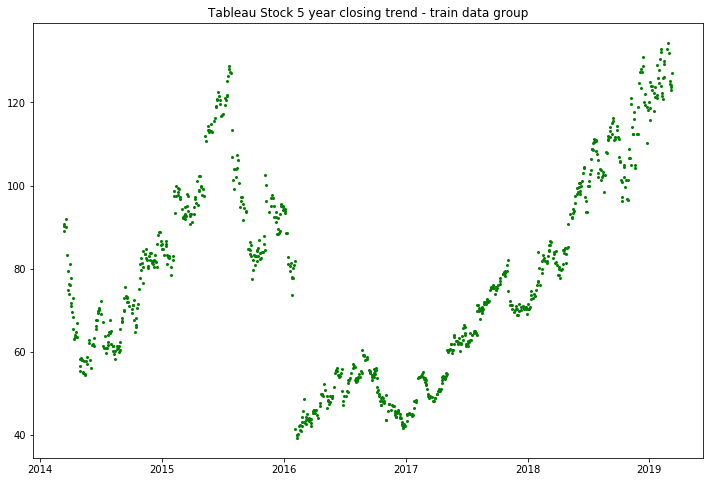

In [10]:
plt.plot(X_train, Y_train, 'go', markersize=2)
plt.title('Tableau Stock 5 year closing trend - train data group')

Text(0.5, 1.0, 'Tableau Stock 5 year closing trend - test data group')

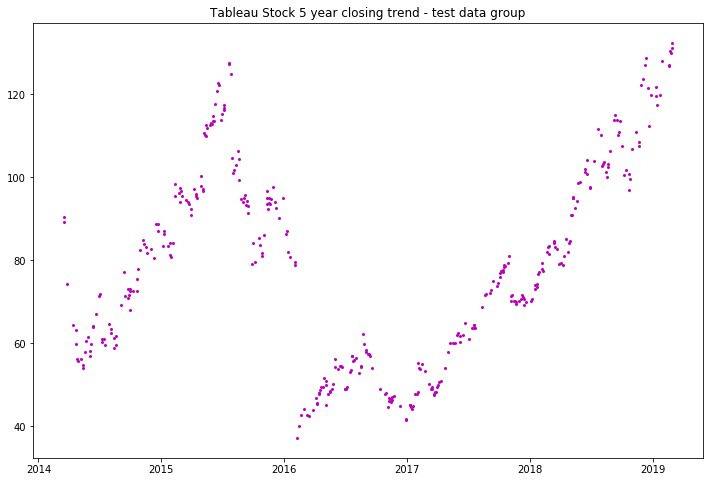

In [11]:
plt.plot(X_test, Y_test, 'mo', markersize=2)
plt.title('Tableau Stock 5 year closing trend - test data group')

In [12]:
X_years = [matplotlib.dates.date2num(x) for x in X_train]

coefs_lin = poly.polyfit(X_years, Y_train, 1)
coefs_sq = poly.polyfit(X_years, Y_train, 2)
coefs_ten = poly.polyfit(X_years, Y_train, 10)

/home/evyhaan/.local/share/virtualenvs/data_analysis-JK9izll_/lib/python3.7/site-packages/ipykernel_launcher.py:5: RankWarning: The fit may be poorly conditioned
  """


In [13]:
X_line = np.linspace(matplotlib.dates.date2num(X_train.min()), matplotlib.dates.date2num(X_train.max()), 100000)

In [14]:
ffit_ln = poly.polyval(X_line, coefs_lin)
ffit_sq = poly.polyval(X_line, coefs_sq)
ffit_ten = poly.polyval(X_line, coefs_ten)

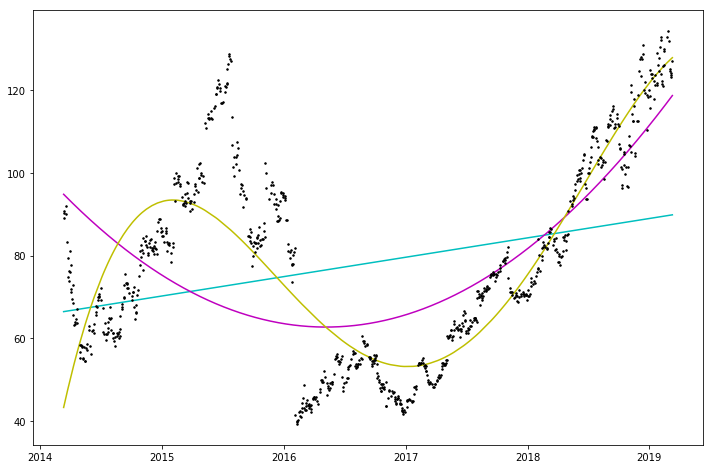

In [15]:
plt.ylim(min(Y_train - 5), max(Y_train + 5))

plt.plot(X_line, ffit_ln, 'c')
plt.plot(X_line, ffit_sq, 'm')
plt.plot(X_line, ffit_ten, 'y')

plt.plot(X_train, Y_train, 'k.', markersize=3)

## 2 Year Data

In [16]:
res2y = requests.get(f'{API_URL}/stock/{STOCK}/chart/2y')
data = res2y.json()
df2y = pd.DataFrame(data)

df2y['date'] = df2y['date'].apply((lambda x: pd.Timestamp(x)))

In [17]:
df2y.head(5)

,change,changeOverTime,changePercent,close,date,high,label,low,open,unadjustedVolume,volume,vwap
0,0.11,0.000000,0.225,48.94,2017-03-13,49.07,"Mar 13, 17",48.43,48.83,1012577,1012577,48.7469
1,0.15,0.003065,0.306,49.09,2017-03-14,49.17,"Mar 14, 17",48.17,48.71,696654,696654,48.7382
2,0.33,0.009808,0.672,49.42,2017-03-15,49.63,"Mar 15, 17",48.72,49.13,1704875,1704875,49.3225
3,0.04,0.010625,0.081,49.46,2017-03-16,49.87,"Mar 16, 17",49.41,49.69,442311,442311,49.5655
4,-0.36,0.003269,-0.728,49.10,2017-03-17,49.85,"Mar 17, 17",48.97,49.82,818013,818013,49.2094


In [18]:
df2y.describe()

,change,changeOverTime,changePercent,close,high,low,open,unadjustedVolume,volume,vwap
count,502.000000,502.000000,502.000000,502.000000,502.000000,502.000000,502.000000,5.020000e+02,5.020000e+02,502.000000
mean,0.155837,0.785730,0.217414,87.393645,88.617784,86.082114,87.306076,9.494662e+05,9.494662e+05,87.389107
std,2.270059,0.467083,2.320375,22.859019,23.402611,22.250849,22.822755,6.643921e+05,6.643921e+05,22.847325
min,-11.920000,-0.027380,-10.272000,47.600000,48.110000,47.300000,47.600000,2.042570e+05,2.042570e+05,47.760300
25%,-0.570000,0.436504,-0.706250,70.302500,70.922500,69.750000,70.285000,5.924085e+05,5.924085e+05,70.341625
50%,0.165000,0.670924,0.228000,81.775000,83.110000,80.935000,81.915000,7.579970e+05,7.579970e+05,82.158800
75%,1.040000,1.174755,1.201750,106.432500,108.082500,104.155000,106.387500,1.125032e+06,1.125032e+06,106.324425
max,16.130000,1.746016,15.358000,134.390000,134.970000,133.080000,133.950000,6.713861e+06,6.713861e+06,134.194400


In [19]:
df2y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 502 entries, 0 to 501
Data columns (total 12 columns):
change              502 non-null float64
changeOverTime      502 non-null float64
changePercent       502 non-null float64
close               502 non-null float64
date                502 non-null datetime64[ns]
high                502 non-null float64
label               502 non-null object
low                 502 non-null float64
open                502 non-null float64
unadjustedVolume    502 non-null int64
volume              502 non-null int64
vwap                502 non-null float64
dtypes: datetime64[ns](1), float64(8), int64(2), object(1)
memory usage: 47.1+ KB


In [20]:
X_train, X_test, Y_train, Y_test = train_test_split(df2y['date'], df2y['close'], test_size = 0.3, random_state=42)

Text(0.5, 1.0, 'Tableau Stock 2 year closing trend - train data group')

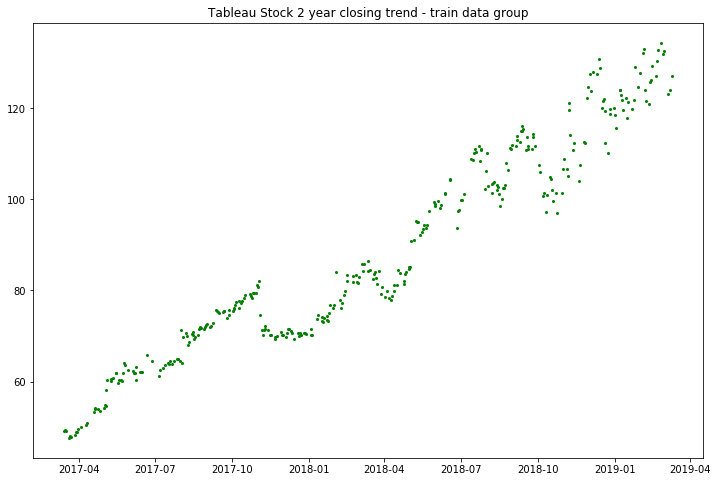

In [21]:
plt.plot(X_train, Y_train, 'go', markersize=2)
plt.title('Tableau Stock 2 year closing trend - train data group')

Text(0.5, 1.0, 'Tableau Stock 2 year closing trend - test data group')

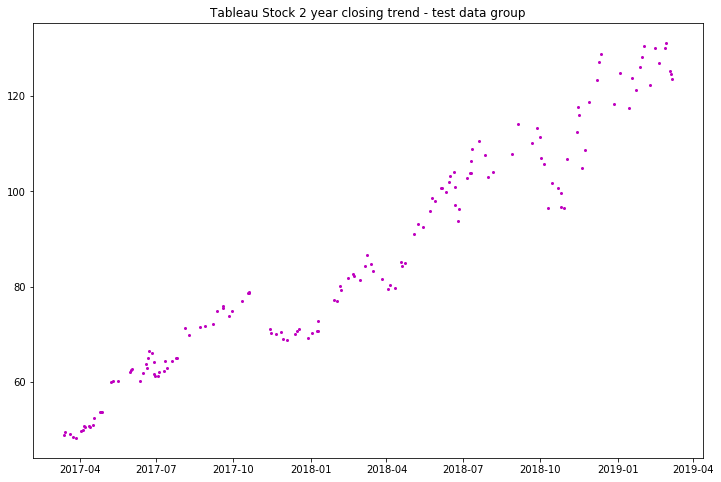

In [22]:
plt.plot(X_test, Y_test, 'mo', markersize=2)
plt.title('Tableau Stock 2 year closing trend - test data group')

In [23]:
X_years = [matplotlib.dates.date2num(x) for x in X_train]

coefs_lin = poly.polyfit(X_years, Y_train, 1)
coefs_sq = poly.polyfit(X_years, Y_train, 2)
coefs_ten = poly.polyfit(X_years, Y_train, 10)

/home/evyhaan/.local/share/virtualenvs/data_analysis-JK9izll_/lib/python3.7/site-packages/ipykernel_launcher.py:5: RankWarning: The fit may be poorly conditioned
  """


In [24]:
X_line = np.linspace(matplotlib.dates.date2num(X_train.min()), matplotlib.dates.date2num(X_train.max()), 100000)

In [25]:
ffit_ln = poly.polyval(X_line, coefs_lin)
ffit_sq = poly.polyval(X_line, coefs_sq)
ffit_ten = poly.polyval(X_line, coefs_ten)

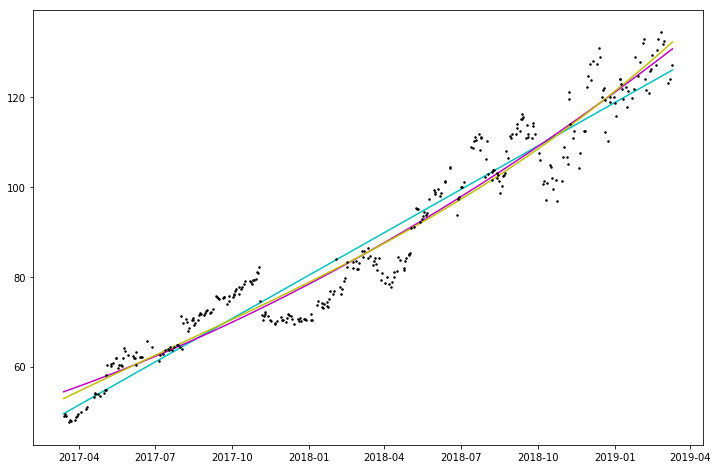

In [26]:
plt.ylim(min(Y_train - 5), max(Y_train + 5))

plt.plot(X_line, ffit_ln, 'c')
plt.plot(X_line, ffit_sq, 'm')
plt.plot(X_line, ffit_ten, 'y')

plt.plot(X_train, Y_train, 'k.', markersize=3)

#### Conclusions
1. The stock is currently at steady increasing trend.
2. It is currently at a slightly higher peak than it was before it's last drop.
3. I think it the increase will continue for a little while, but begin to level off a bit.